In [2]:
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


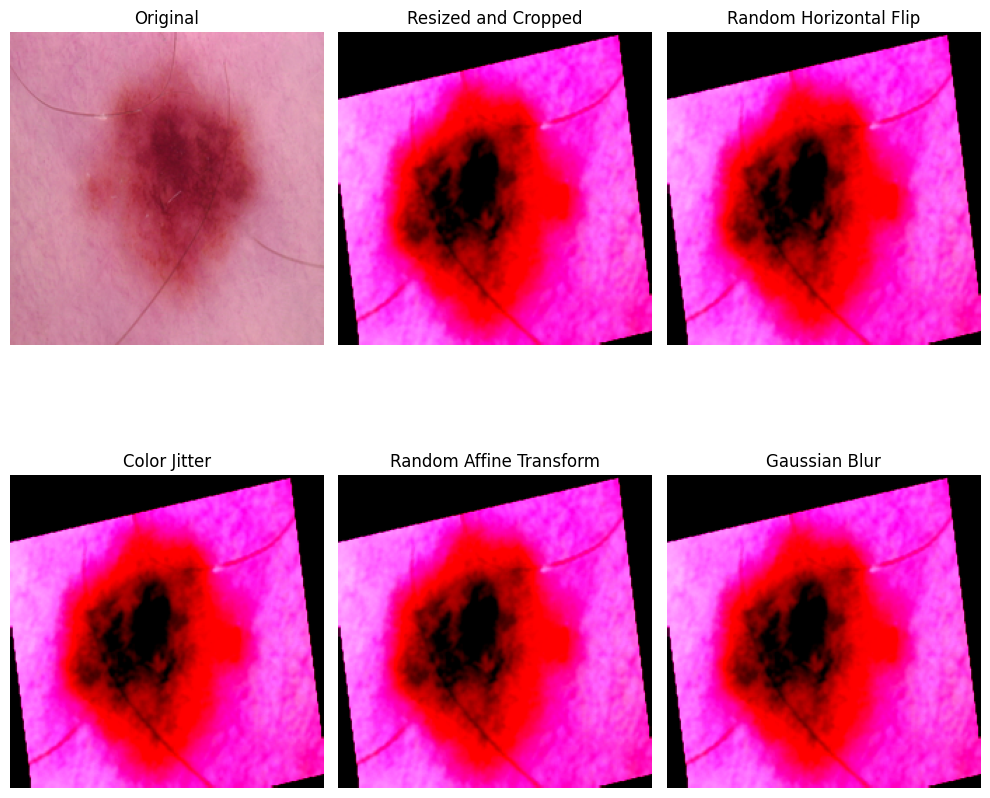

In [4]:
def main(input_image_path):
    # Define image size and normalization values
    image_size = 224
    normalization_mean = [0.485, 0.456, 0.406]
    normalization_std = [0.229, 0.224, 0.225]

    # Define the transformations
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
        transforms.RandomAffine(degrees=15, scale=(0.9, 1.1), shear=10, translate=(0.1, 0.1)),
        transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 5)),
        transforms.ToTensor(),
        transforms.Normalize(normalization_mean, normalization_std)
    ])

    # Load the input image
    input_image = Image.open(input_image_path).convert("RGB")

    # Apply the transformations to the input image
    transformed_image = train_transform(input_image)

    # Convert the transformed image to a NumPy array
    transformed_image = transformed_image.permute(1, 2, 0).numpy()

    # Display the intermediate transformed images
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 3, 1)
    plt.title("Original")
    plt.imshow(np.array(input_image))
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title("Resized and Cropped")
    plt.imshow(transformed_image)
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title("Random Horizontal Flip")
    plt.imshow(transformed_image)
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title("Color Jitter")
    plt.imshow(transformed_image)
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title("Random Affine Transform")
    plt.imshow(transformed_image)
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title("Gaussian Blur")
    plt.imshow(transformed_image)
    plt.axis('off')

    plt.tight_layout()
    plt.savefig('plot.pdf', format='pdf')
    plt.show()

# Example usage
input_image_path = "/mnt/d/dev/JupyterProjects/Data/Cancer/benign-malignant/data/test/benign/16.jpg"
main(input_image_path)
